In [1]:
from datetime import datetime
import time 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
folder_path = "Inertia_Sensors_Dataset/"
file_name = 'WalkingUpstairs.csv'
file_path = folder_path + file_name

df1 = pd.read_csv(file_path)

print(f"Number of rows: {len(df1)}")
print(f"Number of columns: {len(df1.columns)}")

print("\nData from", file_name)
print(df1)

Number of rows: 2324
Number of columns: 14

Data from WalkingUpstairs.csv
      ACCELEROMETER X (m/s²)  ACCELEROMETER Y (m/s²)  ACCELEROMETER Z (m/s²)  \
0                     1.5562                  0.7095                  6.0849   
1                     7.2769                 -0.5246                 -2.1652   
2                     8.8786                 -4.2739                  1.4952   
3                     9.6329                 -4.5326                  0.5330   
4                     1.5120                 -6.3473                 -4.3678   
...                      ...                     ...                     ...   
2319                 -1.9750                  4.6900                  6.4240   
2320                 -0.6940                  4.2090                  6.9890   
2321                 -2.4640                  3.8000                  7.0220   
2322                  0.4430                  5.1760                  5.7150   
2323                 -3.9340                  

Missing values in each column:
ACCELEROMETER X (m/s²)          0
ACCELEROMETER Y (m/s²)          0
ACCELEROMETER Z (m/s²)          0
GRAVITY X (m/s²)                0
GRAVITY Y (m/s²)                0
GRAVITY Z (m/s²)                0
LINEAR ACCELERATION X (m/s²)    0
LINEAR ACCELERATION Y (m/s²)    0
LINEAR ACCELERATION Z (m/s²)    0
GYROSCOPE X (rad/s)             0
GYROSCOPE Y (rad/s)             0
GYROSCOPE Z (rad/s)             0
Time since start in ms          0
YYYY-MO-DD HH-MI-SS_SSS         0
dtype: int64

Descriptive statistics:
       ACCELEROMETER X (m/s²)  ACCELEROMETER Y (m/s²)  ACCELEROMETER Z (m/s²)  \
count             2324.000000             2324.000000             2324.000000   
mean                -0.825479                0.196850               -1.702111   
std                  3.541910                9.545865                3.706261   
min                -19.082000              -26.057800              -21.182000   
25%                 -3.108000               -8.876

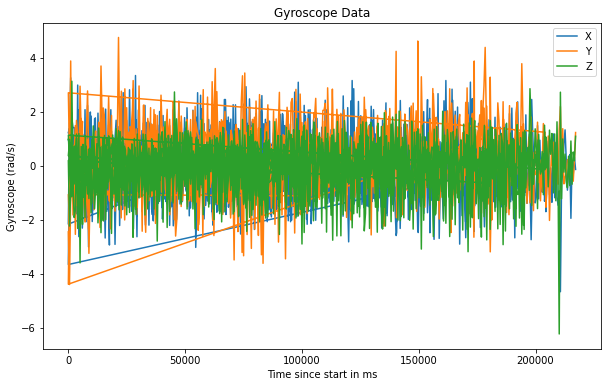

In [3]:
folder_path = "Inertia_Sensors_Dataset/"
file_name = 'WalkingUpstairs.csv'
file_path = folder_path + file_name

df1 = pd.read_csv(file_path)

print("Missing values in each column:")
print(df1.isnull().sum())

print("\nDescriptive statistics:")
print(df1.describe())

plt.figure(figsize=(10, 6))
plt.plot(df1['Time since start in ms '], df1['GYROSCOPE X (rad/s)'], label='X')
plt.plot(df1['Time since start in ms '], df1['GYROSCOPE Y (rad/s)'], label='Y')
plt.plot(df1['Time since start in ms '], df1['GYROSCOPE Z (rad/s)'], label='Z')
plt.xlabel('Time since start in ms')
plt.ylabel('Gyroscope (rad/s)')
plt.title('Gyroscope Data')
plt.legend()
plt.show()

In [4]:
df1['Timestamp (microseconds)'] = pd.to_datetime(df1['YYYY-MO-DD HH-MI-SS_SSS'], format='%Y-%m-%d %H:%M:%S:%f').values.astype(np.int64) // 1000

df1.drop(columns=['YYYY-MO-DD HH-MI-SS_SSS'], inplace=True)

print("Missing values in each column:")
print(df1.isnull().sum())

print("\nDescriptive statistics:")
print(df1.describe())

Missing values in each column:
ACCELEROMETER X (m/s²)          0
ACCELEROMETER Y (m/s²)          0
ACCELEROMETER Z (m/s²)          0
GRAVITY X (m/s²)                0
GRAVITY Y (m/s²)                0
GRAVITY Z (m/s²)                0
LINEAR ACCELERATION X (m/s²)    0
LINEAR ACCELERATION Y (m/s²)    0
LINEAR ACCELERATION Z (m/s²)    0
GYROSCOPE X (rad/s)             0
GYROSCOPE Y (rad/s)             0
GYROSCOPE Z (rad/s)             0
Time since start in ms          0
Timestamp (microseconds)        0
dtype: int64

Descriptive statistics:
       ACCELEROMETER X (m/s²)  ACCELEROMETER Y (m/s²)  ACCELEROMETER Z (m/s²)  \
count             2324.000000             2324.000000             2324.000000   
mean                -0.825479                0.196850               -1.702111   
std                  3.541910                9.545865                3.706261   
min                -19.082000              -26.057800              -21.182000   
25%                 -3.108000               -8.876

In [5]:
folder_path = "Inertia_Sensors_Dataset/"
file_name = 'WalkingUpstairs.csv'
file_path = folder_path + file_name

df1 = pd.read_csv(file_path)

print("Original DataFrame:")
print(df1.head())

df1['Timestamp (microseconds)'] = pd.to_datetime(df1['YYYY-MO-DD HH-MI-SS_SSS'], format='%Y-%m-%d %H:%M:%S:%f').view(np.int64) // 1000

print("\nDataFrame with converted timestamps:")
print(df1[['YYYY-MO-DD HH-MI-SS_SSS', 'Timestamp (microseconds)']].head())

df1.drop(columns=['YYYY-MO-DD HH-MI-SS_SSS'], inplace=True)

start = pd.Timestamp(year=2021, month=2, day=19, hour=23, minute=34, second=25, microsecond=292000)
start_ts = int(start.timestamp() * 1e6)

end = pd.Timestamp(year=2021, month=5, day=19, hour=23, minute=35, second=27, microsecond=728000)
end_ts = int(end.timestamp() * 1e6)

DF1 = df1.loc[(df1['Timestamp (microseconds)'] >= start_ts) & (df1['Timestamp (microseconds)'] <= end_ts)]

DF1['Activity_Label'] = 'Walking Upstairs'

DF1 = DF1[['Timestamp (microseconds)', 'GYROSCOPE X (rad/s)', 'GYROSCOPE Y (rad/s)', 'GYROSCOPE Z (rad/s)', 'Activity_Label']]
DF1 = DF1.rename(columns={
    'GYROSCOPE X (rad/s)': 'Gyro X (°/s)',
    'GYROSCOPE Y (rad/s)': 'Gyro Y (°/s)',
    'GYROSCOPE Z (rad/s)': 'Gyro Z (°/s)'
})

DF1.reset_index(drop=True, inplace=True)

print("\nFiltered DataFrame with index column:")
print(DF1)

Original DataFrame:
   ACCELEROMETER X (m/s²)  ACCELEROMETER Y (m/s²)  ACCELEROMETER Z (m/s²)  \
0                  1.5562                  0.7095                  6.0849   
1                  7.2769                 -0.5246                 -2.1652   
2                  8.8786                 -4.2739                  1.4952   
3                  9.6329                 -4.5326                  0.5330   
4                  1.5120                 -6.3473                 -4.3678   

   GRAVITY X (m/s²)  GRAVITY Y (m/s²)  GRAVITY Z (m/s²)  \
0            0.2632            0.4997            9.7904   
1            9.2784            3.1178            0.6004   
2            8.8093           -4.2702           -0.5764   
3            6.9259           -6.9189            0.5749   
4            5.0671           -6.1685           -5.6960   

   LINEAR ACCELERATION X (m/s²)  LINEAR ACCELERATION Y (m/s²)  \
0                        0.0788                       -1.0523   
1                       -1.3063 

/tmp/ipykernel_8318/1892961587.py:10: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  df1['Timestamp (microseconds)'] = pd.to_datetime(df1['YYYY-MO-DD HH-MI-SS_SSS'], format='%Y-%m-%d %H:%M:%S:%f').view(np.int64) // 1000


In [6]:
output_file_path = "Final_Cleaned_WalkingUpstairs_Gyro.csv"
DF1.to_csv(output_file_path, index=False)

print(f"Filtered DataFrame saved to {output_file_path}")

Filtered DataFrame saved to Final_Cleaned_WalkingUpstairs_Gyro.csv


In [7]:
filtered_df = pd.read_csv("Final_Cleaned_WalkingUpstairs_Gyro.csv")

filtered_df.reset_index(drop=True, inplace=True)

print("\nLoaded DataFrame with numerical index and Timestamp (microseconds):")
print(filtered_df)


Loaded DataFrame with numerical index and Timestamp (microseconds):
      Timestamp (microseconds)  Gyro X (°/s)  Gyro Y (°/s)  Gyro Z (°/s)  \
0             1621445339397000        1.2247       -2.4480        0.9781   
1             1621445339896000        1.3857       -4.3990        0.9725   
2             1621445340397000        0.5073       -1.3277       -0.1839   
3             1621445340896000        0.5340        1.9811        0.5398   
4             1621445341397000       -0.0038       -1.8220       -0.8392   
...                        ...           ...           ...           ...   
2319          1621446623827000       -1.9460       -0.0440        0.9180   
2320          1621446624328000        0.1590        0.0460       -0.6820   
2321          1621446624828000       -0.3030       -0.5710        0.5110   
2322          1621446625327000        0.3270        0.2390        0.1830   
2323          1621446625828000       -0.1350        1.2320        1.0920   

        Activity_L